In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [5]:
# Load the normalised training set and remove the columns that aren't numerical
normalised_training = pd.read_csv(os.path.join("Data","training_normalised.csv"))
numerical_feature_df = normalised_training.select_dtypes(include = ["int64", "float64"])

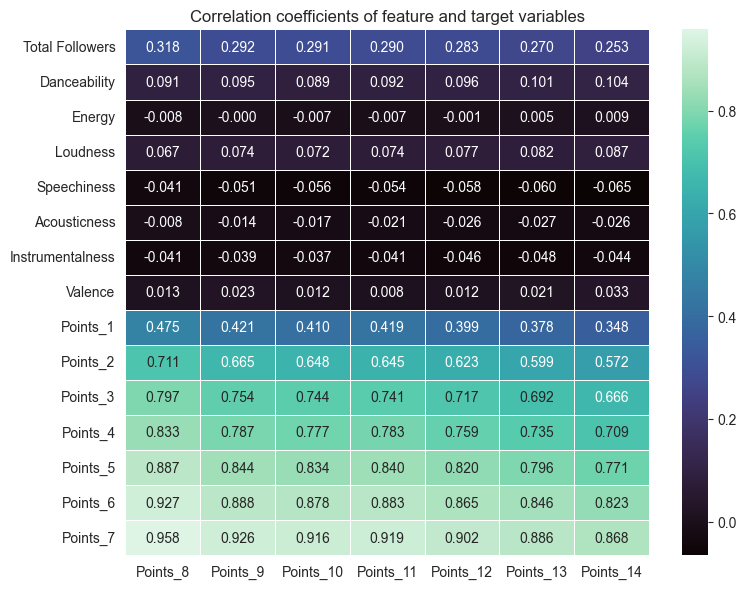

In [7]:
# Plot the correlation matrix, where y-axis represents the predictor features and x-axis represents the target features
y_features = ['Total Followers', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Valence', 'Points_1', 'Points_2',
       'Points_3', 'Points_4', 'Points_5', 'Points_6', 'Points_7']
x_features = ['Points_8','Points_9', 'Points_10', 'Points_11', 'Points_12', 'Points_13','Points_14']

# Create a new dataframe to store the predictor, target feature correlation pairs
corr = pd.DataFrame()
for y in y_features:
    for x in x_features:
        corr.loc[y, x] = numerical_feature_df.corr().loc[y, x]
        
plt.figure(figsize=(8, 6))

plt.title("Correlation coefficients of feature and target variables")
sb.heatmap(corr, annot=True, cmap='mako', fmt=".3f", linewidths=.5)
plt.tight_layout()
plt.savefig(os.path.join("report","figures", "correlation_matrix.png"))
plt.show()


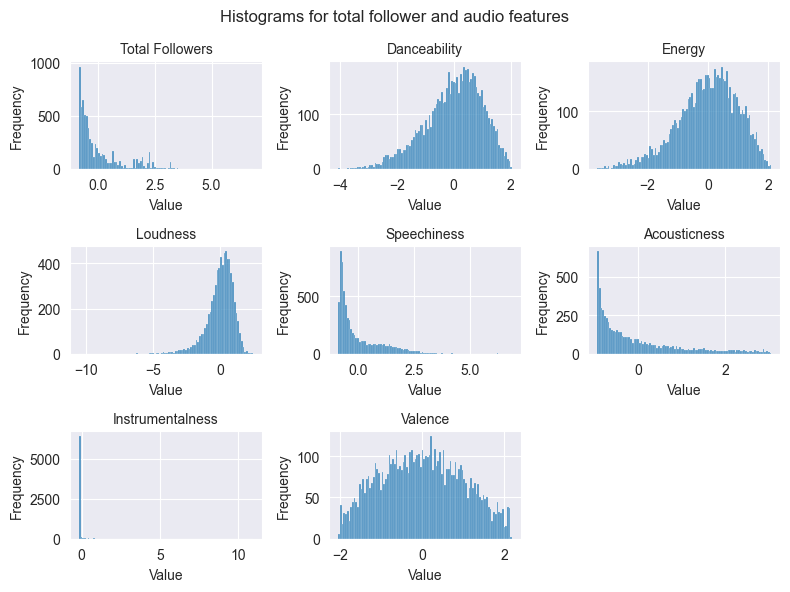

In [12]:
# Generate a plot of histograms for the followers and audio features

predictor_features = numerical_feature_df.columns[:-14]
figure, axes = plt.subplots(3, 3, figsize=(8, 6))
axes = axes.flatten() 

for i, column in enumerate(predictor_features):
    sb.histplot(numerical_feature_df[column], ax=axes[i], bins=100)
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

figure.delaxes(axes[-1])

figure.suptitle("Histograms for total follower and audio features")
figure.tight_layout()
figure.savefig(os.path.join("report","figures", "fol_audio_hist.png"))


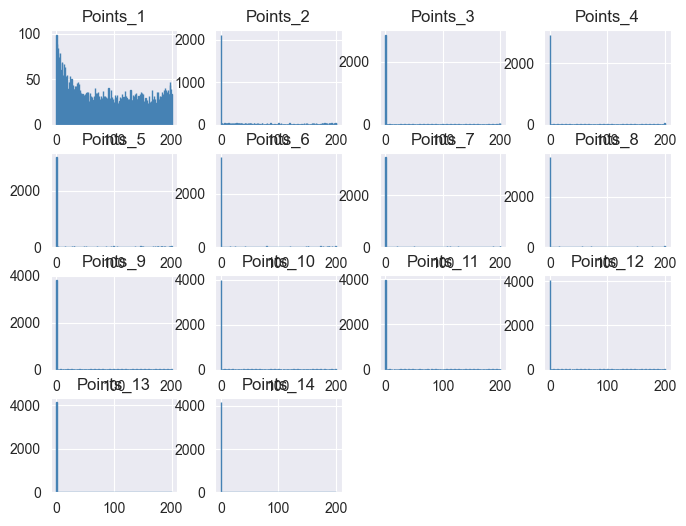

In [13]:
# Generate histograms for point features
point_histograms = numerical_feature_df.iloc[:,-14:].hist(figsize = (8,6), bins = 1000,color = "steelblue", ec="steelblue")

C:\Users\User\AppData\Local\Temp\ipykernel_15480\2750713277.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i].set_ylim(0,10**3.8)
C:\Users\User\AppData\Local\Temp\ipykernel_15480\2750713277.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i].set_ylim(0,10**3.8)
C:\Users\User\AppData\Local\Temp\ipykernel_15480\2750713277.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i].set_ylim(0,10**3.8)


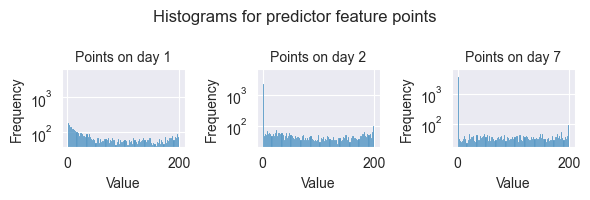

In [14]:
# Generate histograms for points on day 1, 2, and 7 on a log scale
points_predictors = ['Points_1', 'Points_2', 'Points_7']
figure, axes = plt.subplots(1, 3, figsize=(6, 2))
axes = axes.flatten() 

for i, column in enumerate(points_predictors):
    sb.histplot(numerical_feature_df[column], ax=axes[i], bins=100)
    title = column.split("_")[1]
    axes[i].set_title(f"Points on day {title}", fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_yscale('log')
    axes[i].set_ylim(0,10**3.8)

figure.suptitle("Histograms for predictor feature points")
figure.tight_layout()
figure.savefig(os.path.join("report","figures", "predict_point_hist.png"))

C:\Users\User\AppData\Local\Temp\ipykernel_15480\883926266.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i].set_ylim(0,10**3.8)
C:\Users\User\AppData\Local\Temp\ipykernel_15480\883926266.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i].set_ylim(0,10**3.8)
C:\Users\User\AppData\Local\Temp\ipykernel_15480\883926266.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i].set_ylim(0,10**3.8)


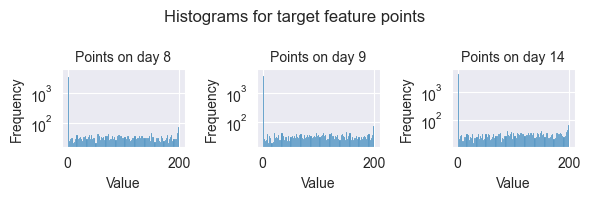

In [16]:
# Generate histograms for points on day 8, 9, and 14 on a log scale
points_targets =  ['Points_8', 'Points_9','Points_14']
figure, axes = plt.subplots(1, 3, figsize=(6, 2))
axes = axes.flatten() 

for i, column in enumerate(points_targets):
    sb.histplot(numerical_feature_df[column], ax=axes[i], bins=100)
    title = column.split("_")[1]
    axes[i].set_title(f"Points on day {title}", fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
    axes[i].set_yscale('log')
    axes[i].set_ylim(0,10**3.8)

figure.suptitle("Histograms for target feature points")
figure.tight_layout()
figure.savefig(os.path.join("report","figures", "target_point_hist.png"))

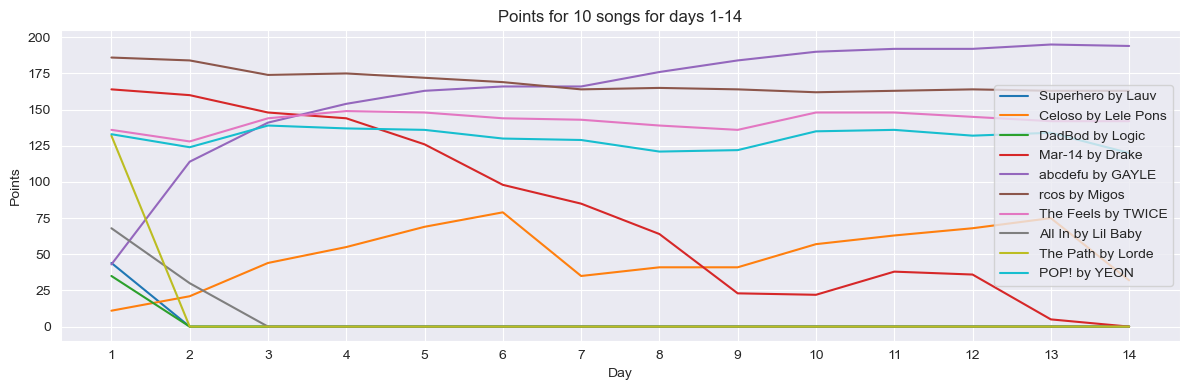

In [110]:
# Generate a plot depicting points over 14 days for 10 randomly selected songs
sample_count = 10
sample_songs = normalised_training.sample(sample_count)

plt.figure(figsize=(12, 4))
for i in range(sample_count):
    song_entry = sample_songs.iloc[i,:]
    plt.plot(np.arange(1, 15), song_entry.iloc[-14:], label = f"{song_entry.iloc[0]} by {song_entry.iloc[1]}")
plt.xlabel("Day")
plt.ylabel("Points")
plt.title(f"Points for {sample_count} songs for days 1-14")
plt.xticks(range(1, 15))
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("report","figures", "10_song_points.png"))
plt.show()